In [2]:
import cv2
import scipy.io

In [3]:
""" Load dataset """

# I = scipy.io.loadmat('cat_image.mat')['I']
# mask = scipy.io.loadmat('cat_mask.mat')['mask']
# L = scipy.io.loadmat('cat_light.mat')['L']

I = scipy.io.loadmat('ball_image.mat')['I']
mask = scipy.io.loadmat('ball_mask.mat')['mask']
L = scipy.io.loadmat('ball_light.mat')['L']

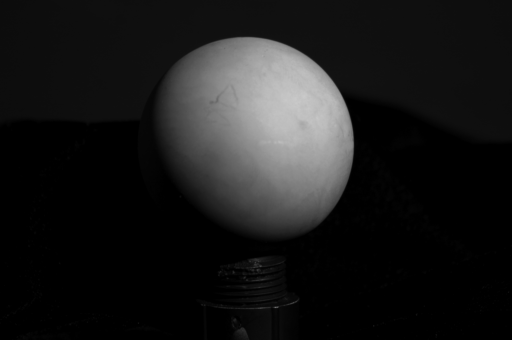

In [4]:
""" Show images """

from google.colab.patches import cv2_imshow
cv2_imshow(I[:,:,0])

In [5]:
import numpy as np

def normal_map(image, light, mask):

    nrows = image.shape[0] # get size of image
    ncols = image.shape[1]
    numimage = image.shape[2]

    surfnorm = np.zeros((nrows, ncols, 3)) # Initialize
    albedo = np.zeros((nrows, ncols))
    for i in range(0, nrows):
        for j in range(0, ncols):
            surfnorm[i, j, 0] = 0.0 # initialize normal(x)
            surfnorm[i, j, 1] = 0.0 # initialize normal(x)
            surfnorm[i, j, 2] = 1.0 # initialize normal(z)
            albedo[i, j] = 0.0 # initialize albedo

    for i in range(0, nrows):
        for j in range(0, ncols):
            if mask[i,j] > 0: # calculate only on the object area
                temp = np.zeros((numimage))
                for im in range(0, numimage):
                    temp[im] = np.double(image[i, j, im])
                NP, R, fail = pixelnorm(temp, light) # get pixel-wise outputs
                surfnorm[i, j, 0] = NP[0]
                surfnorm[i, j, 1] = NP[1]
                surfnorm[i, j, 2] = NP[2]
                albedo[i, j] = R

    maxval = np.max(albedo)
    if maxval > 0:
        albedo = albedo / maxval

    return surfnorm, albedo


def pixelnorm(image, light):

    # image.shape = 12      pixel values at a selected location per each image
    # light.shape = (12, 3) three light directions (x, y, z)

    # image = image.T

    fail = 0

    A = light.T.dot(light)
    b = light.T.dot(image)
    g = np.linalg.inv(A).dot(b)
    R = np.linalg.norm(g, ord=2) # Albedo
    N = np.divide(g, R) # Normal vector

    if np.linalg.norm(image, ord=2) < 1.0E-06:
        print('Warning: Pixel intensity is zero')
        N[0] = 0.0
        N[1] = 0.0
        N[2] = 0.0
        R    = 0.0
        fail = 1

    return N, R, fail

In [6]:
""" Calculate normal map """

N, AL = normal_map(I, L, mask)
b, g, r = cv2.split(N)   # img to bgr
N = cv2.merge([r, g, b]) # bgr to rgb and merge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


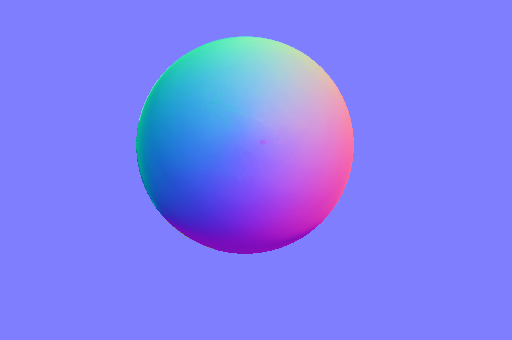

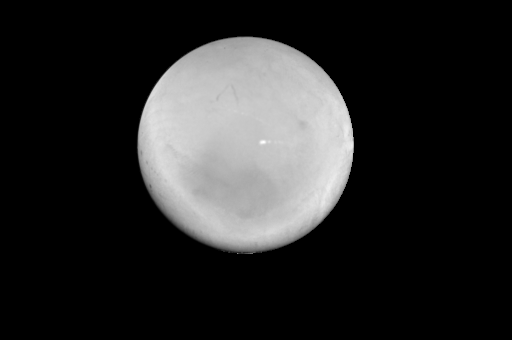

In [7]:
""" Check outputs """
N = cv2.normalize(N, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC3)
cv2_imshow(N)
AL = cv2.normalize(AL, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
cv2_imshow(AL)

In [8]:
""" Calculate normal map """

N, AL = normal_map(I, L, mask)
b, g, r = cv2.split(N)   # img to bgr
N = cv2.merge([r, g, b]) # bgr to rgb and merge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


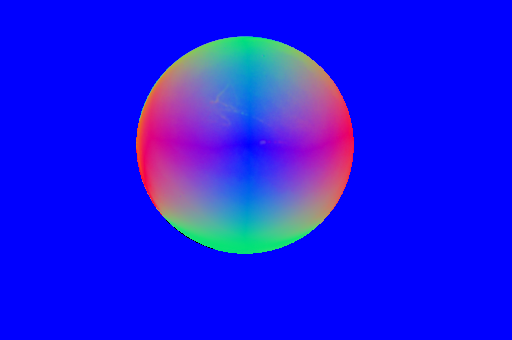

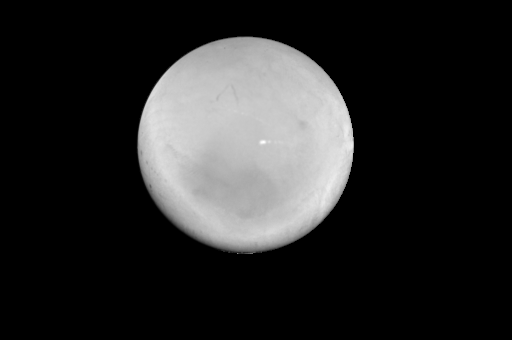

In [9]:
N[N < 0] = -N[N < 0]
N = cv2.normalize(N, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC3)
cv2_imshow(N)
AL = cv2.normalize(AL, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
cv2_imshow(AL)